In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import kabuki
%matplotlib inline
import hddm
print(hddm.__version__)

# For later convergence check
import multiprocessing as mp

0.8.0


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Two condition HDDM (z : trial_type)
#### Load data and check data head
##### Use control.csv

In [2]:
# Load data from csv file into a NumPy structured array
dataCon = hddm.load_csv('./rt_dataframes/control.csv')
dataCon.head(10)
#check number of rows of data
#data.shape

,subjID,rt,win,trial_type,gain,loss,cert,gamble
0,27902f23b60a7b76,2238.0,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1924.0,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1415.0,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2014.0,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1082.0,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1223.0,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1115.0,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1124.0,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1712.0,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1345.0,0.0,102,12.0,0.0,4.0,1.0


## Prep the data
#### Changed the columns name allow hddm to pick up

In [3]:
dataCon = dataCon.rename(columns={'subjID'
: 
'subj_idx',
'gamble':
'response'})
dataCon['rt'] = dataCon['rt']/1000
dataCon.head(10)

,subj_idx,rt,win,trial_type,gain,loss,cert,response
0,27902f23b60a7b76,2.238,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1.924,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1.415,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2.014,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1.082,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1.223,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1.115,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1.124,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1.712,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1.345,0.0,102,12.0,0.0,4.0,1.0


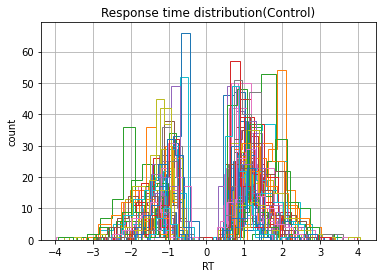

In [4]:
#flip the error RTs to be negative
dataCon = hddm.utils.flip_errors(dataCon)
#plt the RTs grouped by participants
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Response time distribution(Control)')
for i, subj_data in dataCon.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
# plt.savefig('./fitting_results/HDDM/HDDM2C(allparameter)/rt_distribution(con).png')

## Fitting the hierarchical model for one condition with no subject effects for Control participants

In [5]:
m = hddm.HDDM(dataCon,depends_on={'z': 'trial_type'}, include=('v', 'a', 't', 'z', 'sv', 'st', 'sz'))

m.find_starting_values()
m.sample(3000, burn=1000, dbname='./fitting_results/HDDM/HDDM2C(allparameter)/traces(2CCon_z)', db='pickle')
m.save('./fitting_results/HDDM/HDDM2C(allparameter)/model(2CCon_z)')

/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3001 of 3000 complete in 6854.1 sec

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting sv
Plotting sz
Plotting st
Plotting z(101)
Plotting z(102)
Plotting z_std


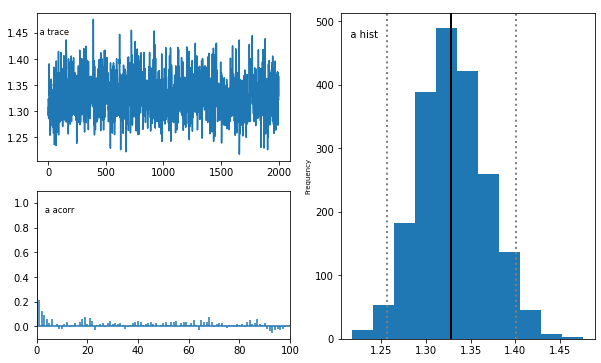

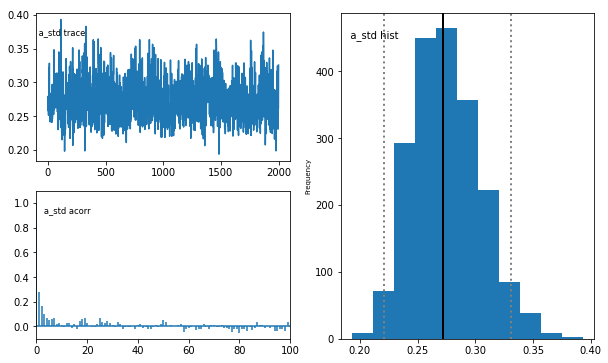

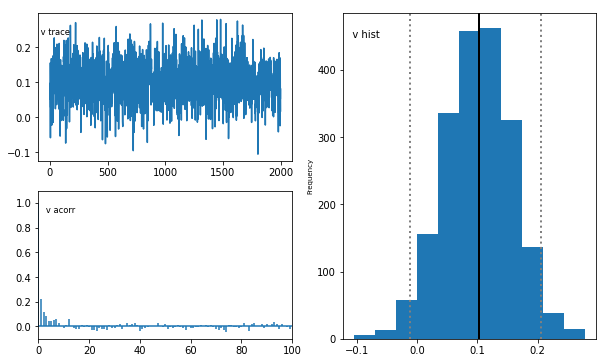

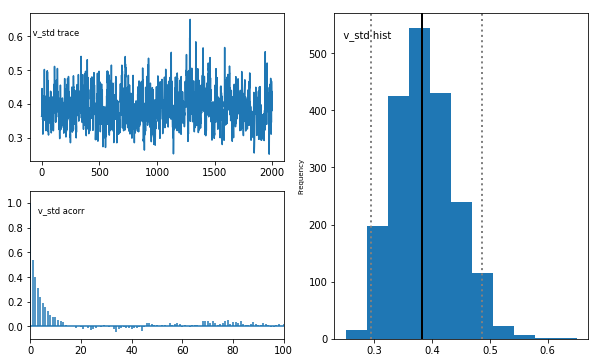

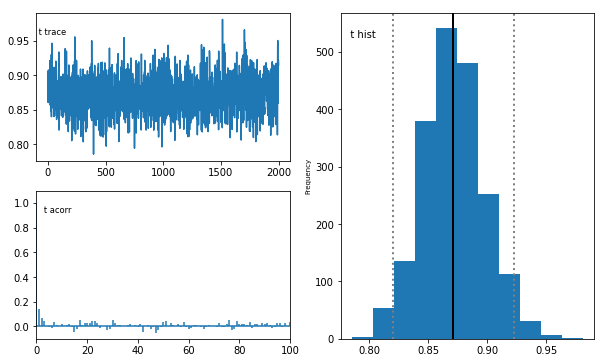

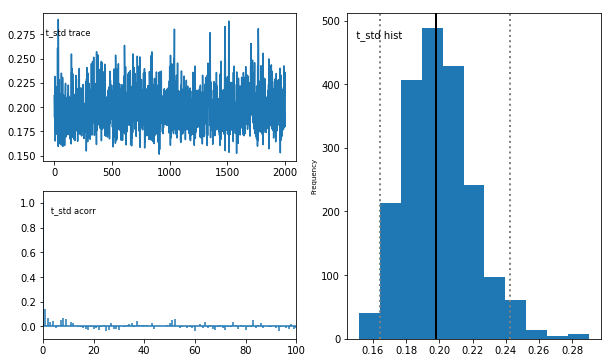

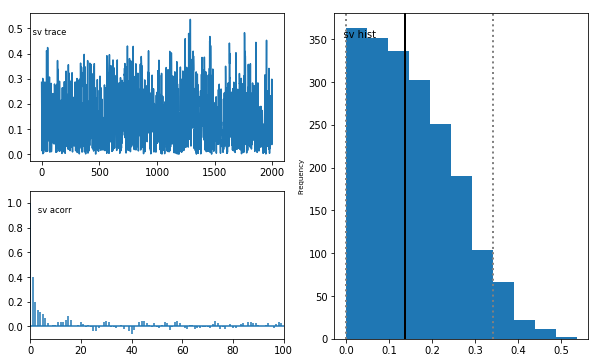

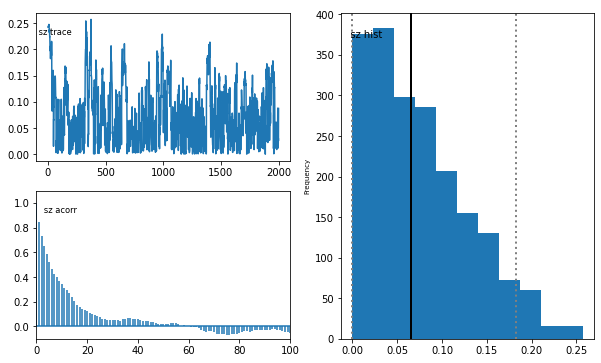

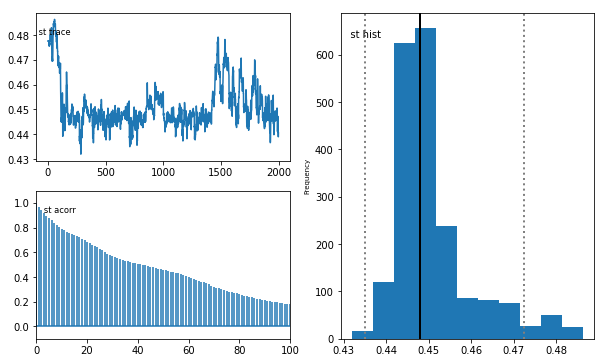

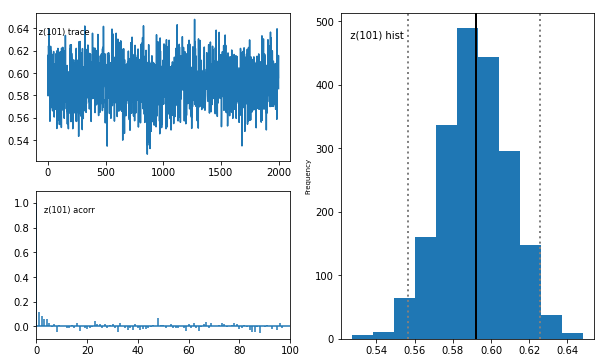

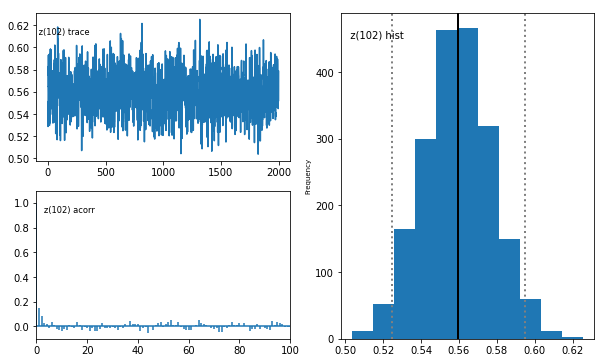

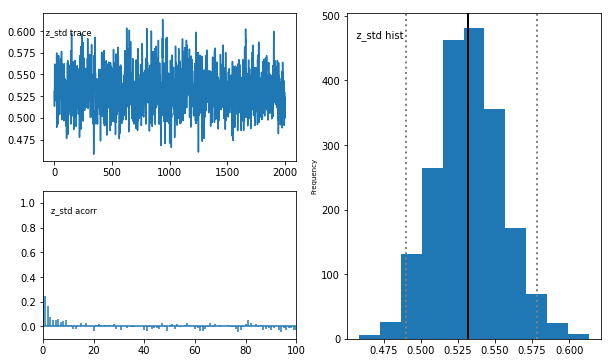

In [6]:
# plot posteriors
m.plot_posteriors(['v', 'a', 't', 'z', 'sv', 'st', 'sz', 'v_std', 'a_std','t_std','z_std','st_std','sz_std'])

In [7]:
stats2Cz = m.gen_stats()
stats2Cz.to_csv('./fitting_results/HDDM/HDDM2C(allparameter)/HDDM2CCon_z.csv', sep=',')
stats2Cz[stats2Cz.index.isin(['v', 'a', 't', 'z', 'sv', 'st', 'sz', 'v_std', 'a_std',
                              't_std','z_std','st_std','sz_std'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.33057,0.0375709,1.26039,1.30445,1.32867,1.35513,1.40712,0.00119314
a_std,0.274791,0.0292219,0.226069,0.253595,0.272302,0.293938,0.337534,0.000988389
v,0.101417,0.0566318,-0.0098918,0.0622328,0.102866,0.140346,0.210424,0.0019563
v_std,0.387256,0.0519166,0.29929,0.348558,0.383027,0.42032,0.495877,0.0025029
t,0.871598,0.0262537,0.820363,0.854439,0.871255,0.888583,0.923278,0.000749732
t_std,0.199712,0.0204793,0.165188,0.185369,0.198043,0.21172,0.244649,0.000631012
sv,0.151789,0.102286,0.00742602,0.0679093,0.138036,0.221794,0.373628,0.0040174
sz,0.0759502,0.0554377,0.00259221,0.0315168,0.0654746,0.11172,0.202167,0.00421186
st,0.450961,0.0093014,0.438804,0.445488,0.448014,0.453263,0.477774,0.000870656
z_std,0.532507,0.0229054,0.490883,0.516807,0.532137,0.547794,0.579828,0.000750926


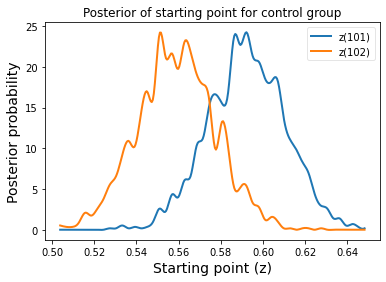

In [8]:
z_101, z_102 = m.nodes_db.node[['z(101)', 'z(102)']]
z_101_trace, z_102_trace = m.nodes_db.node[['z(101)', 'z(102)']]
hddm.analyze.plot_posterior_nodes([z_101, z_102])
plt.xlabel('Starting point (z)', fontsize = 14)
plt.ylabel('Posterior probability', fontsize = 14)
plt.title('Posterior of starting point for control group', fontsize = 12)
plt.savefig('./fitting_results/HDDM/HDDM2C(allparameter)/posterior_zCon(101,102).png')

In [9]:
m.dic

14615.72240107431

## Check for model convergence

In [10]:
# Set up models list to append results
models = list()

In [13]:
def fit_hddm_chain(data, chain_num):
    print(f'Fitting chain {chain_num}')
    m = hddm.HDDM(data,depends_on={'z': 'trial_type'},include=('v', 'a', 't', 'z', 'sv', 'st', 'sz'))
    m.find_starting_values()
    m.sample(3000, burn=1000, dbname = f'./fitting_results/HDDM/HDDM2C(allparameter)/chain2Cz_{chain_num}', db='pickle')
    m.save(f'./fitting_results/HDDM/HDDM2C(allparameter)/chain2CzANX_{chain_num}')
    print(f'Finished chain {chain_num}')
    return m

In [14]:
num_chains = 5
data_chains = [(dataCon,chain_num) for chain_num in range(num_chains)]

with mp.Pool(processes=num_chains) as pool:
    models = pool.starmap(fit_hddm_chain, data_chains)
print('Finished all chains')

Fitting chain 0Fitting chain 1

Fitting chain 2
Fitting chain 3
Fitting chain 4


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 -----------------98%----------------- ] 2964 of 3000 complete in 16879.3 sec             0%                  ] 2 of 3000 complete in 0.9 sec[                  0%                  ] 2 of 3000 complete in 0.9 sec[                  0%                  ] 2 of 3000 complete in 1.0 sec[                  0%                  ] 2 of 3000 complete in 1.1 sec[                  0%                  ] 3 of 3000 complete in 2.7 sec[                  0%                  ] 3 of 3000 complete in 2.8 sec[                  0%                  ] 3 of 3000 complete in 2.8 sec[                  0%                  ] 3 of 3000 complete in 3.1 sec[                  0%                  ] 3 of 3000 complete in 3.3 sec[                  0%                  ] 4 of 3000 complete in 3.7 sec[                  0%                  ] 4 of 3000 complete in 4.7 sec[                  0%                  ] 4 of 3000 complete in 4.9 sec[                  0%                  ] 4 of 3000 complete in 5.0 sec[                  

In [15]:
models

In [16]:
results = hddm.analyze.gelman_rubin(models)
for key, value in results.items():
    print(f"{key}: {value}")

a: 1.0008682201282377
a_std: 1.000515101310188
a_subj.02535fcf7e16bb56: 1.0003977486218287
a_subj.09ba82a2ca814481: 1.0017540641274596
a_subj.0abfc32a4d12c731: 1.0004332147564254
a_subj.0b0a94c202d0b233: 1.0018500173017753
a_subj.0d894551bc966608: 1.0005326492260096
a_subj.15e0c065b2c11595: 1.0001816274258728
a_subj.163b12703c8e5c3c: 1.0004476681951635
a_subj.1bf86ff948486447: 1.0000796216667198
a_subj.1cb976bac3a2016b: 1.000060896963791
a_subj.22d84796012679e8: 1.0004401763224777
a_subj.247384e4eccc4f80: 1.0018158237514794
a_subj.27902f23b60a7b76: 1.001337347712581
a_subj.296a71628065dfa8: 1.002867749116799
a_subj.371fb6652968f25f: 1.0014041867170578
a_subj.3ddf191ed8c33c57: 1.0031876196046505
a_subj.414f1040212a659b: 1.0016220567948062
a_subj.46fd6e0b3b5c1df3: 1.0060790369159367
a_subj.4866612e834a9f5a: 1.0028961708542732
a_subj.4a43f99c56b2a634: 1.0025877528628397
a_subj.4e3de1ed1c0d6103: 1.0004382239099108
a_subj.5497867d4afb5993: 1.010112921186399
a_subj.582ab220066afebc: 1.001014

In [17]:
bigger_than_threshold = {}
smaller_than_threshold = {}
for key, value in results.items():
    if value > 1.1:
        bigger_than_threshold[key] = value
    elif value < 0.9:
        smaller_than_threshold[key] = value
print("Values bigger than the threshold:")
print(bigger_than_threshold)

print("\nValues smaller than the threshold:")
print(smaller_than_threshold)

Values bigger than the threshold:
{}

Values smaller than the threshold:
{}


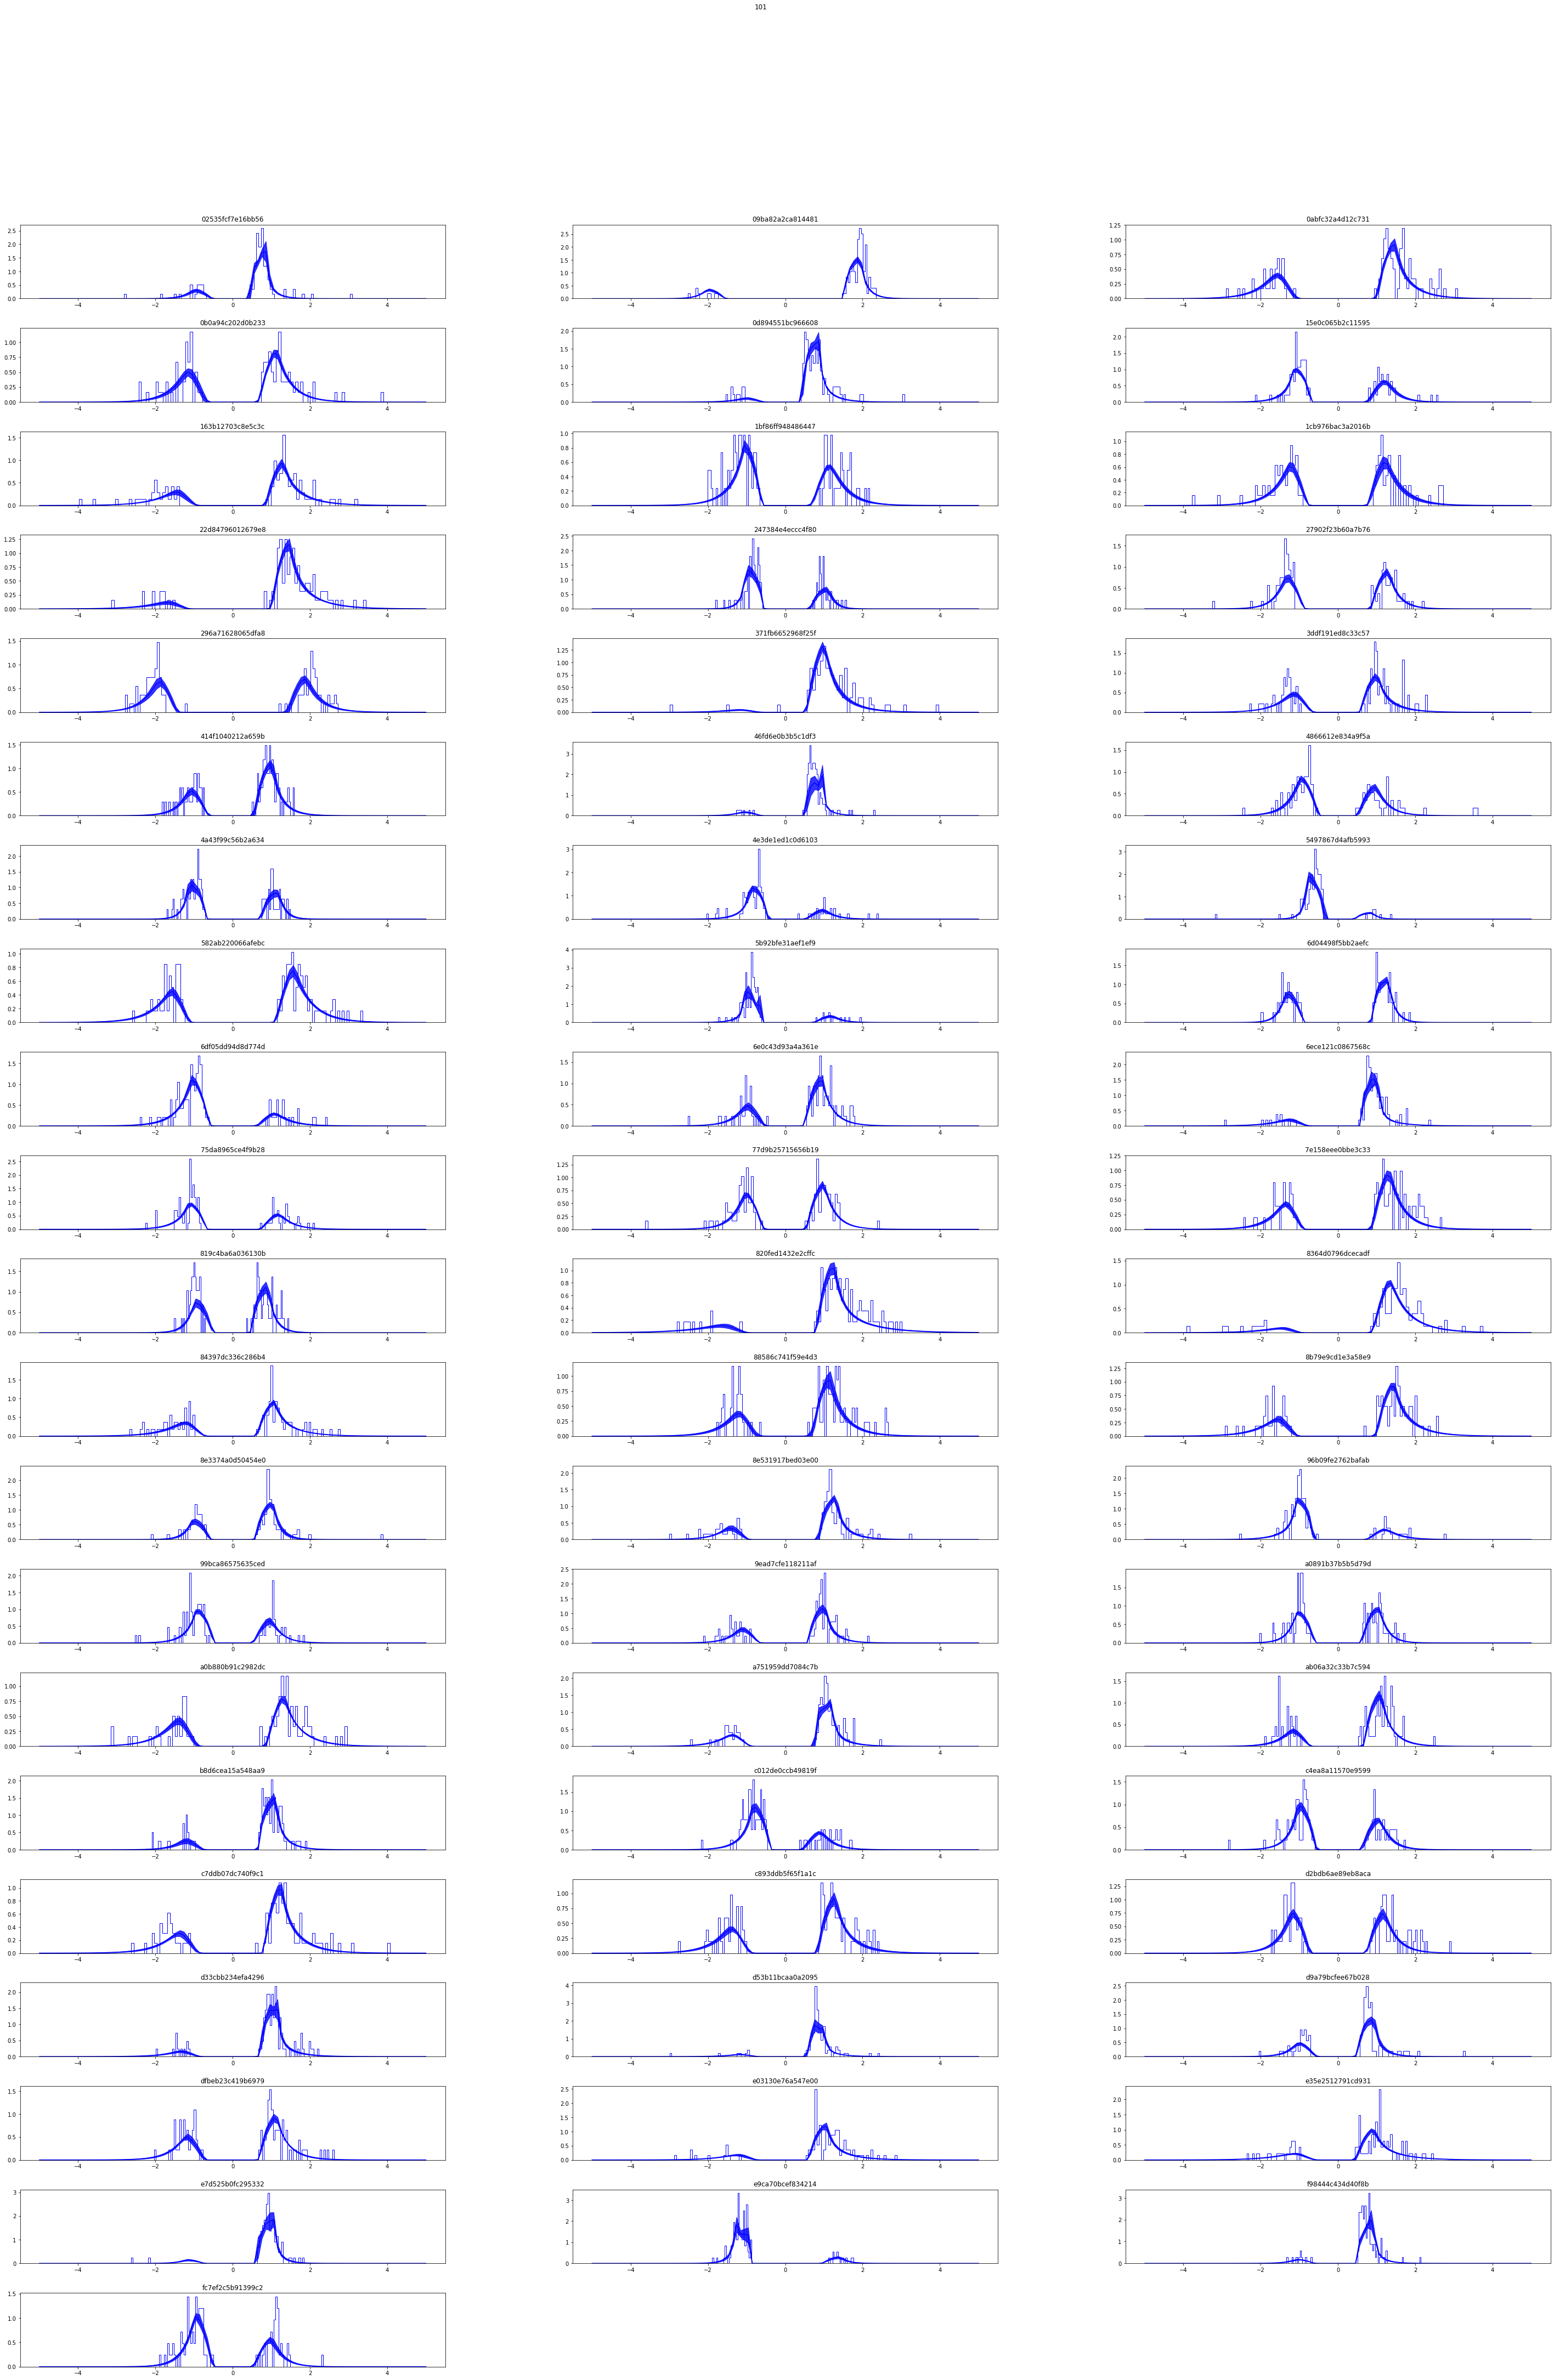

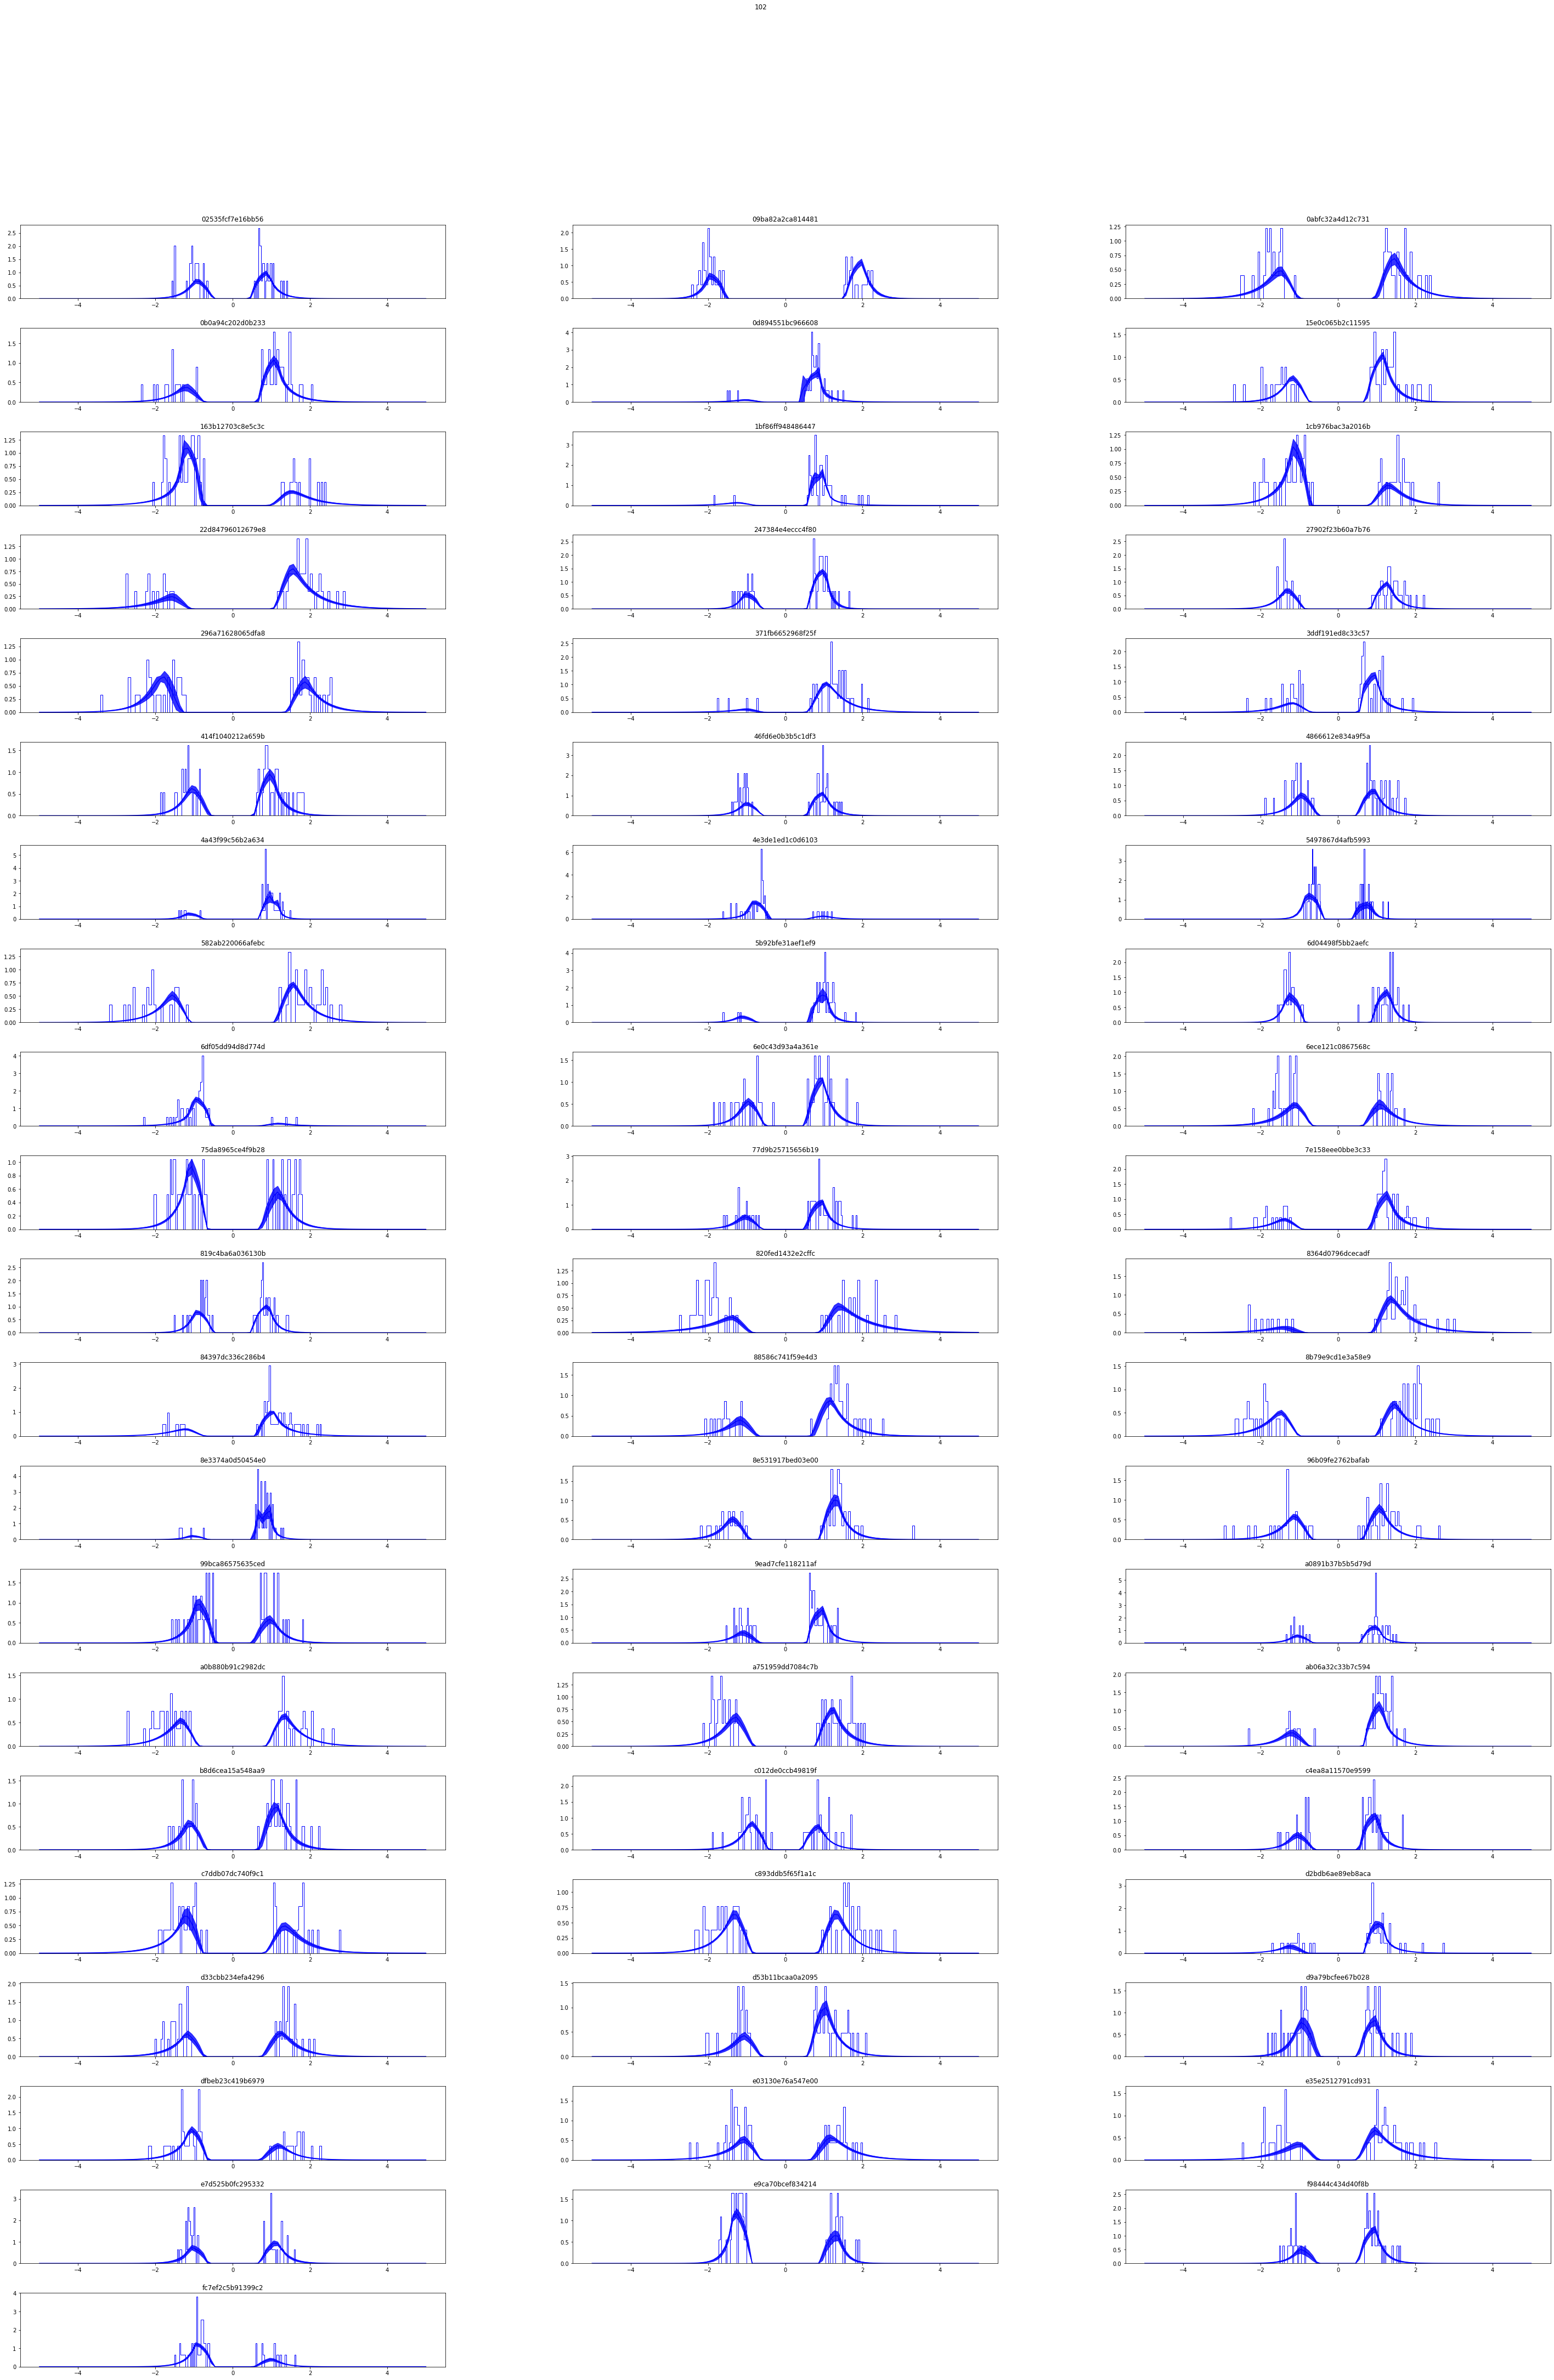

In [18]:
m.plot_posterior_predictive(figsize=(50, 70))